In [81]:
import pygmt
import numpy as np
from IPython.display import display


#define etopo data file
# topo_data = 'path_to_local_data_file'
# topo_data = '@earth_relief_30s' #30 arc second global relief (SRTM15+V2.1 @ 1.0 km)
# topo_data = '@earth_relief_15s' #15 arc second global relief (SRTM15+V2.1)
# topo_data = '@earth_relief_03s' #3 arc second global relief (SRTM3S)


In [82]:
import pandas as pd
# path_input = '../data/data_small/Ibex1_complete_v2_short3.csv'
path_input = '../../Data Dead-reckoning/Ibex complete data/Ibex1_complete_v2.csv'
df = pd.read_csv(path_input, na_values="NA", usecols=['DateTime', 'DDMT_Longitude', 'DDMT_Latitude', 'Altitude', 'AltChnage', 'Distance'])


In [90]:
minlon, maxlon = min(df['DDMT_Longitude']), max(df['DDMT_Longitude'])
minlat, maxlat = min(df['DDMT_Latitude']), max(df['DDMT_Latitude'])
print('Longitude entre :', minlon, maxlon)
print('Latitude entre :', minlat, maxlat)

minlon, maxlon = min(df['DDMT_Longitude'][3600*18+0*60:3600*18+8*60+1]), max(df['DDMT_Longitude'][3600*18+0*60:3600*18+8*60+1])
minlat, maxlat = min(df['DDMT_Latitude'][3600*18+0*60:3600*18+8*60+1]), max(df['DDMT_Latitude'][3600*18+0*60:3600*18+8*60+1])
print('Distance parcourrue sur 8 min:', np.sum(df['Distance'][3600*18+0*60:3600*18+8*60+1]), 'm')
print('Distance parcourrue par min:', [np.sum(df['Distance'][3600*18+i*60:3600*18+(i+1)*60+1]) for i in range(8)], 'm')


# minlon, maxlon = 60, 95
# minlat, maxlat = 0, 25

# minlon, maxlon = 4.4, 7
# minlat, maxlat = 45, 46

minlon, maxlon = 6.03, 6.04
minlat, maxlat = 45.21, 45.22

grid = pygmt.datasets.load_earth_relief(
            "01s",
            region=[minlon, maxlon, minlat, maxlat],
            registration="gridline",
            use_srtm=True,

)
print('Longitude entre :', minlon, maxlon)
print('Latitude entre :', minlat, maxlat)

Longitude entre : 5.98924428132504 6.03816407672564
Latitude entre : 45.1871961755231 45.2237079263469
Distance parcourrue sur 8 min: 127.26023087872751 m
Distance parcourrue par min: [13.664629565994073, 28.40810650356491, 15.535061092763526, 12.975747572634655, 9.491858531678371, 23.55177495828623, 11.05704713119803, 15.063160182011686] m
Longitude entre : 6.03 6.04
Latitude entre : 45.21 45.22


In [103]:
print(type(grid.coords))
print(type(grid.coords['lon'].values))

<class 'numpy.ndarray'>


In [84]:
pts = [(df['DateTime'][3600*18+0*60], df['DDMT_Longitude'][3600*18+0*60], df['DDMT_Latitude'][3600*18+0*60], 'red'),
       (df['DateTime'][3600*18+1*60], df['DDMT_Longitude'][3600*18+1*60], df['DDMT_Latitude'][3600*18+1*60], 'orange'),
       (df['DateTime'][3600*18+2*60], df['DDMT_Longitude'][3600*18+2*60], df['DDMT_Latitude'][3600*18+2*60], 'blue'),
       (df['DateTime'][3600*18+3*60], df['DDMT_Longitude'][3600*18+3*60], df['DDMT_Latitude'][3600*18+3*60], 'green'),
       (df['DateTime'][3600*18+4*60], df['DDMT_Longitude'][3600*18+4*60], df['DDMT_Latitude'][3600*18+4*60], 'yellow'),
       (df['DateTime'][3600*18+5*60], df['DDMT_Longitude'][3600*18+5*60], df['DDMT_Latitude'][3600*18+5*60], 'purple'),
       (df['DateTime'][3600*18+6*60], df['DDMT_Longitude'][3600*18+6*60], df['DDMT_Latitude'][3600*18+6*60], 'black'),
       (df['DateTime'][3600*18+7*60], df['DDMT_Longitude'][3600*18+7*60], df['DDMT_Latitude'][3600*18+7*60], 'white'),
       (df['DateTime'][3600*18+8*60], df['DDMT_Longitude'][3600*18+8*60], df['DDMT_Latitude'][3600*18+8*60], 'grey')]

In [88]:
# Visualization
fig = pygmt.Figure()
# make color pallets
pygmt.makecpt(
    cmap='topo',
    series='1000/3500/1000',
    continuous=True
)
#plot high res topography
fig.grdimage(
    grid=grid,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading=True, 
    frame=True
    )


In [64]:
# GRADIENT
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])


In [65]:
pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=['lSEt+t"Hillshade Map"', "xa0.1", "ya0.1"],
    cmap=True,
)

In [86]:

# plot data points
for pt in pts:
    fig.plot(
        x=pt[1],
        y=pt[2],
        style='c0.1i',
        color=pt[3],
        label=pt[0],
    )

# Plot colorbar
fig.colorbar(
    frame='+l"Topography"'
    )

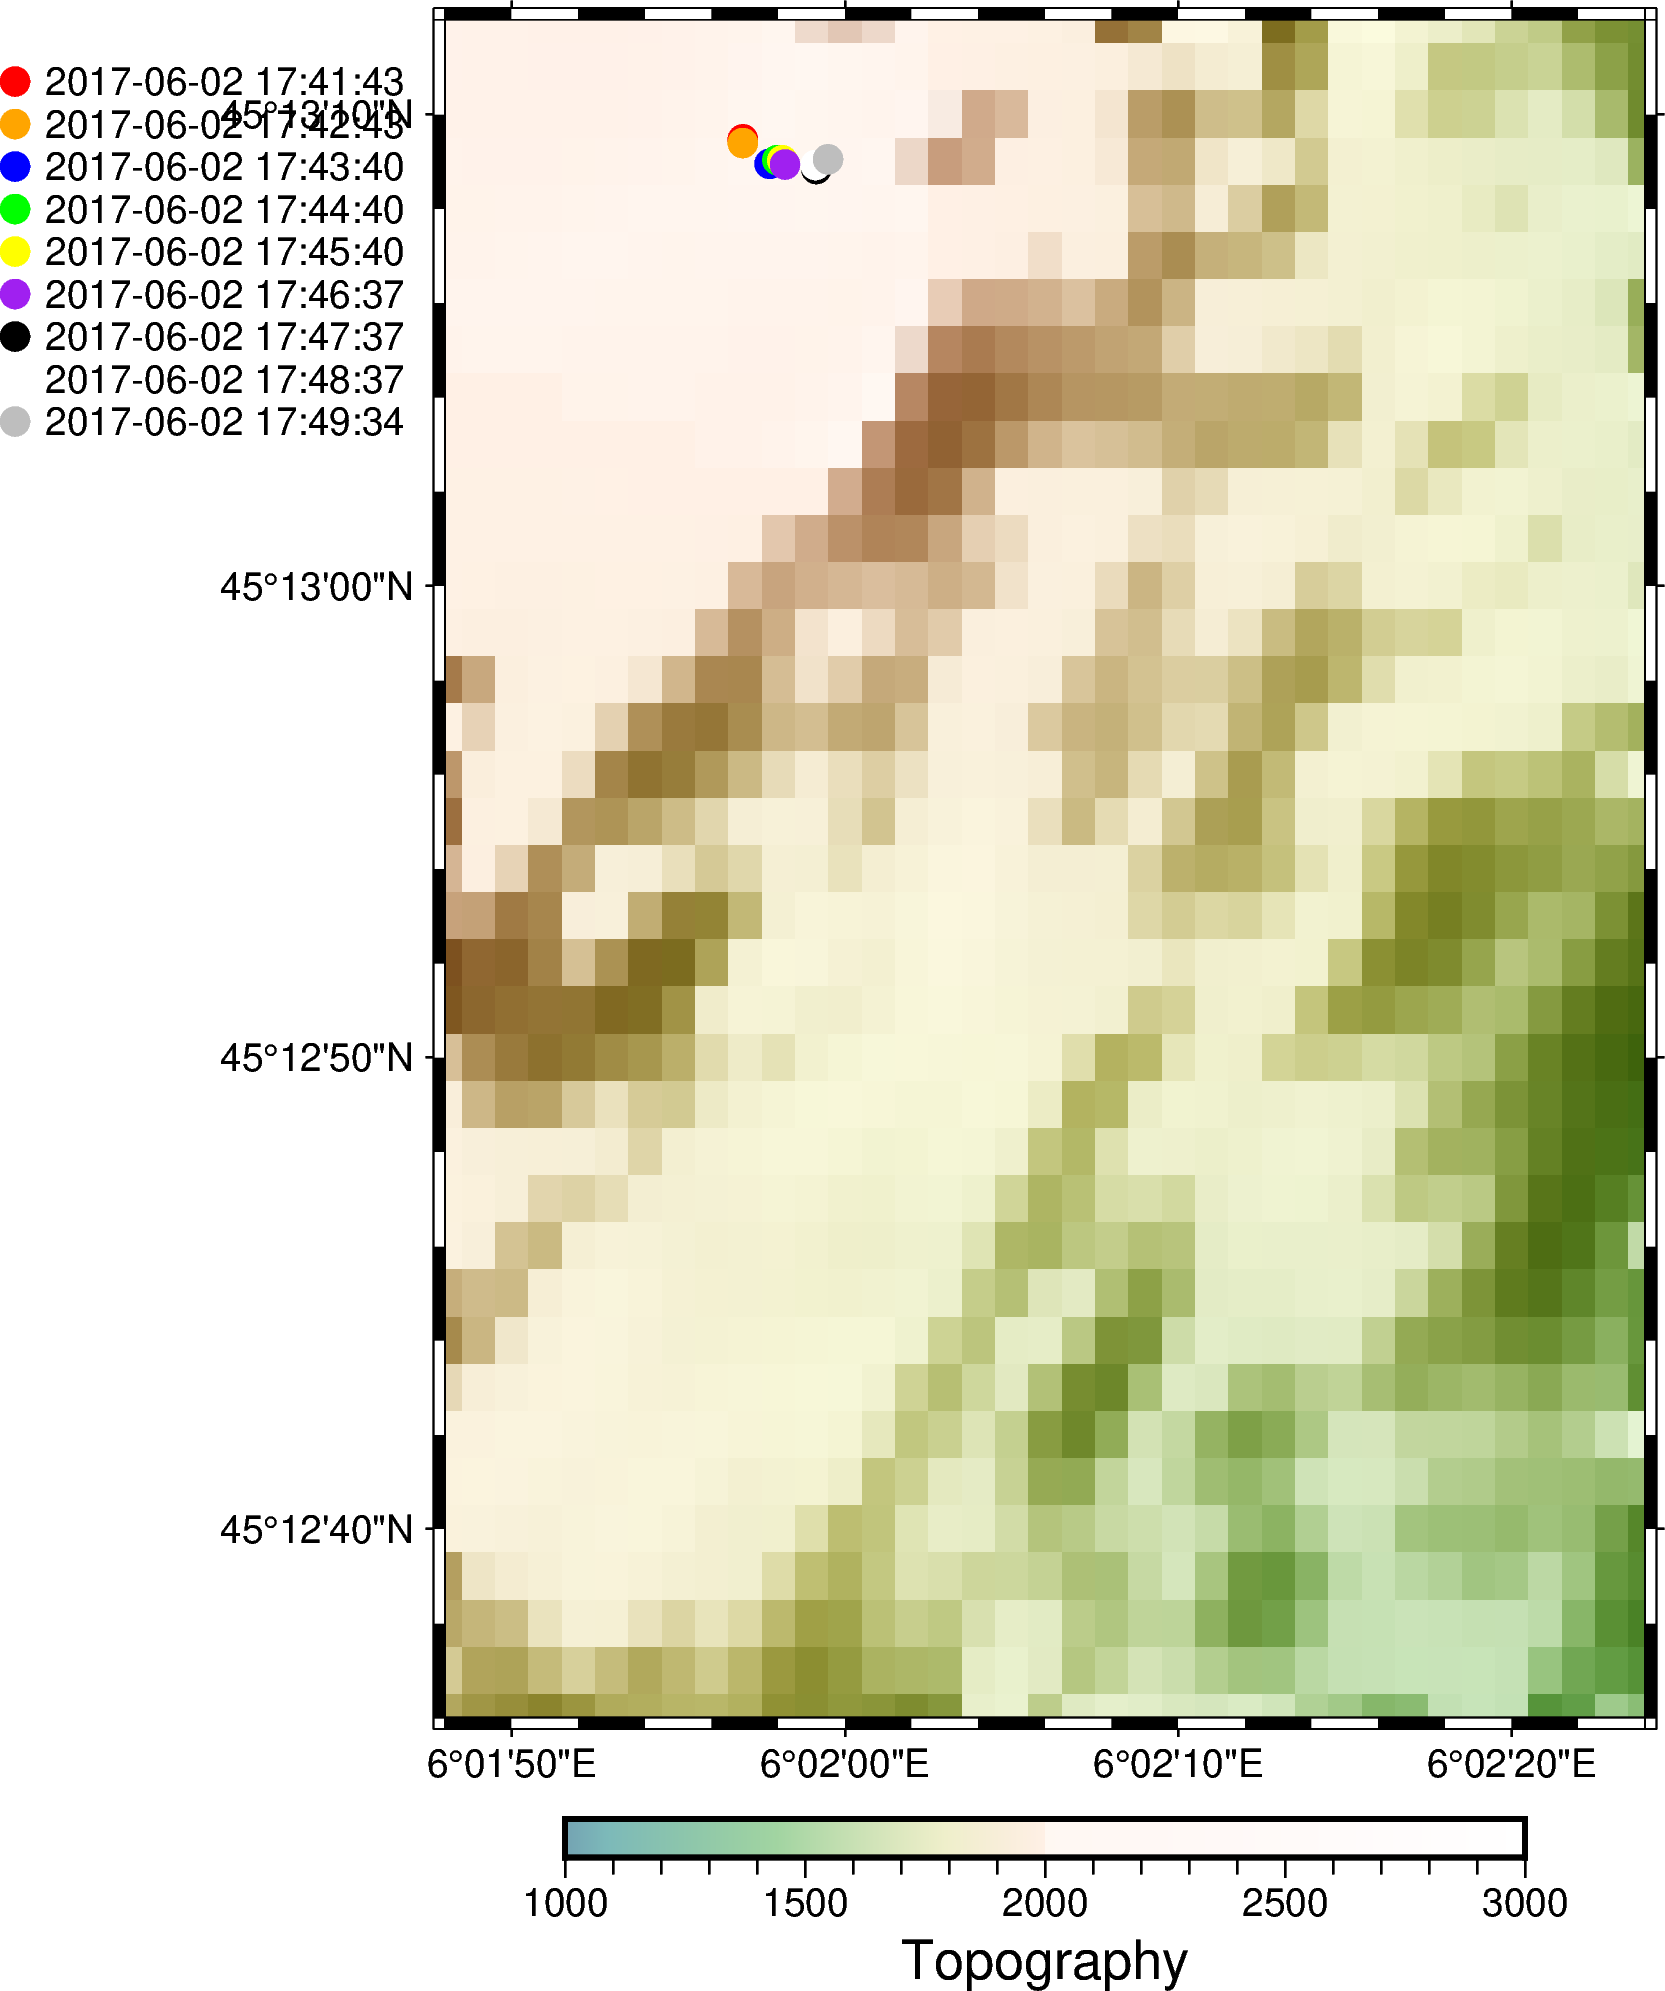

In [87]:
fig.legend(position="JTL+jTR+o0.2c")
fig.show(method='notebook')

In [80]:
print(dgrid.shape)
print(dgrid.isel(dgrid.argmin(...)))
print(dgrid.isel(dgrid.argmax(...)))
print(type(dgrid))
print(dgrid.min)
print(dgrid.max)

(37, 37)
<xarray.DataArray 'z' ()>
array(-0.95000005, dtype=float32)
Coordinates:
    lon      float64 6.04
    lat      float64 45.21
Attributes:
    long_name:     z
    actual_range:  [-0.95000005  0.94999999]
<xarray.DataArray 'z' ()>
array(0.95, dtype=float32)
Coordinates:
    lon      float64 6.031
    lat      float64 45.22
Attributes:
    long_name:     z
    actual_range:  [-0.95000005  0.94999999]
<class 'xarray.core.dataarray.DataArray'>
<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'z' (lat: 37, lon: 37)>
array([[-0.43537444, -0.46625578, -0.48112786, ..., -0.4116683 ,
        -0.31813258, -0.35267684],
       [-0.33810502, -0.43231913, -0.42659998, ..., -0.40626326,
        -0.44573477, -0.46436015],
       [-0.39087638, -0.3745659 , -0.3745659 , ..., -0.37286353,
        -0.50161386, -0.53932434],
       ...,
       [ 0.24610981,  0.24610981,  0.40785083, ..., -0.5422854 ,
        -0.6863345 , -0.8028999 ],
       [ 0.104840

In [ ]:
##############################################
##########     GET THE GRADIENT     ##########
##############################################


grdblend [ERROR]: Failed to remove C:\Users\Raph\AppData\Local\Temp/grdblend_resampled_a22180.nc! [remove error: Permission denied]
grdblend [ERROR]: Failed to delete file C:\Users\Raph\AppData\Local\Temp/grdblend_resampled_a22180.nc


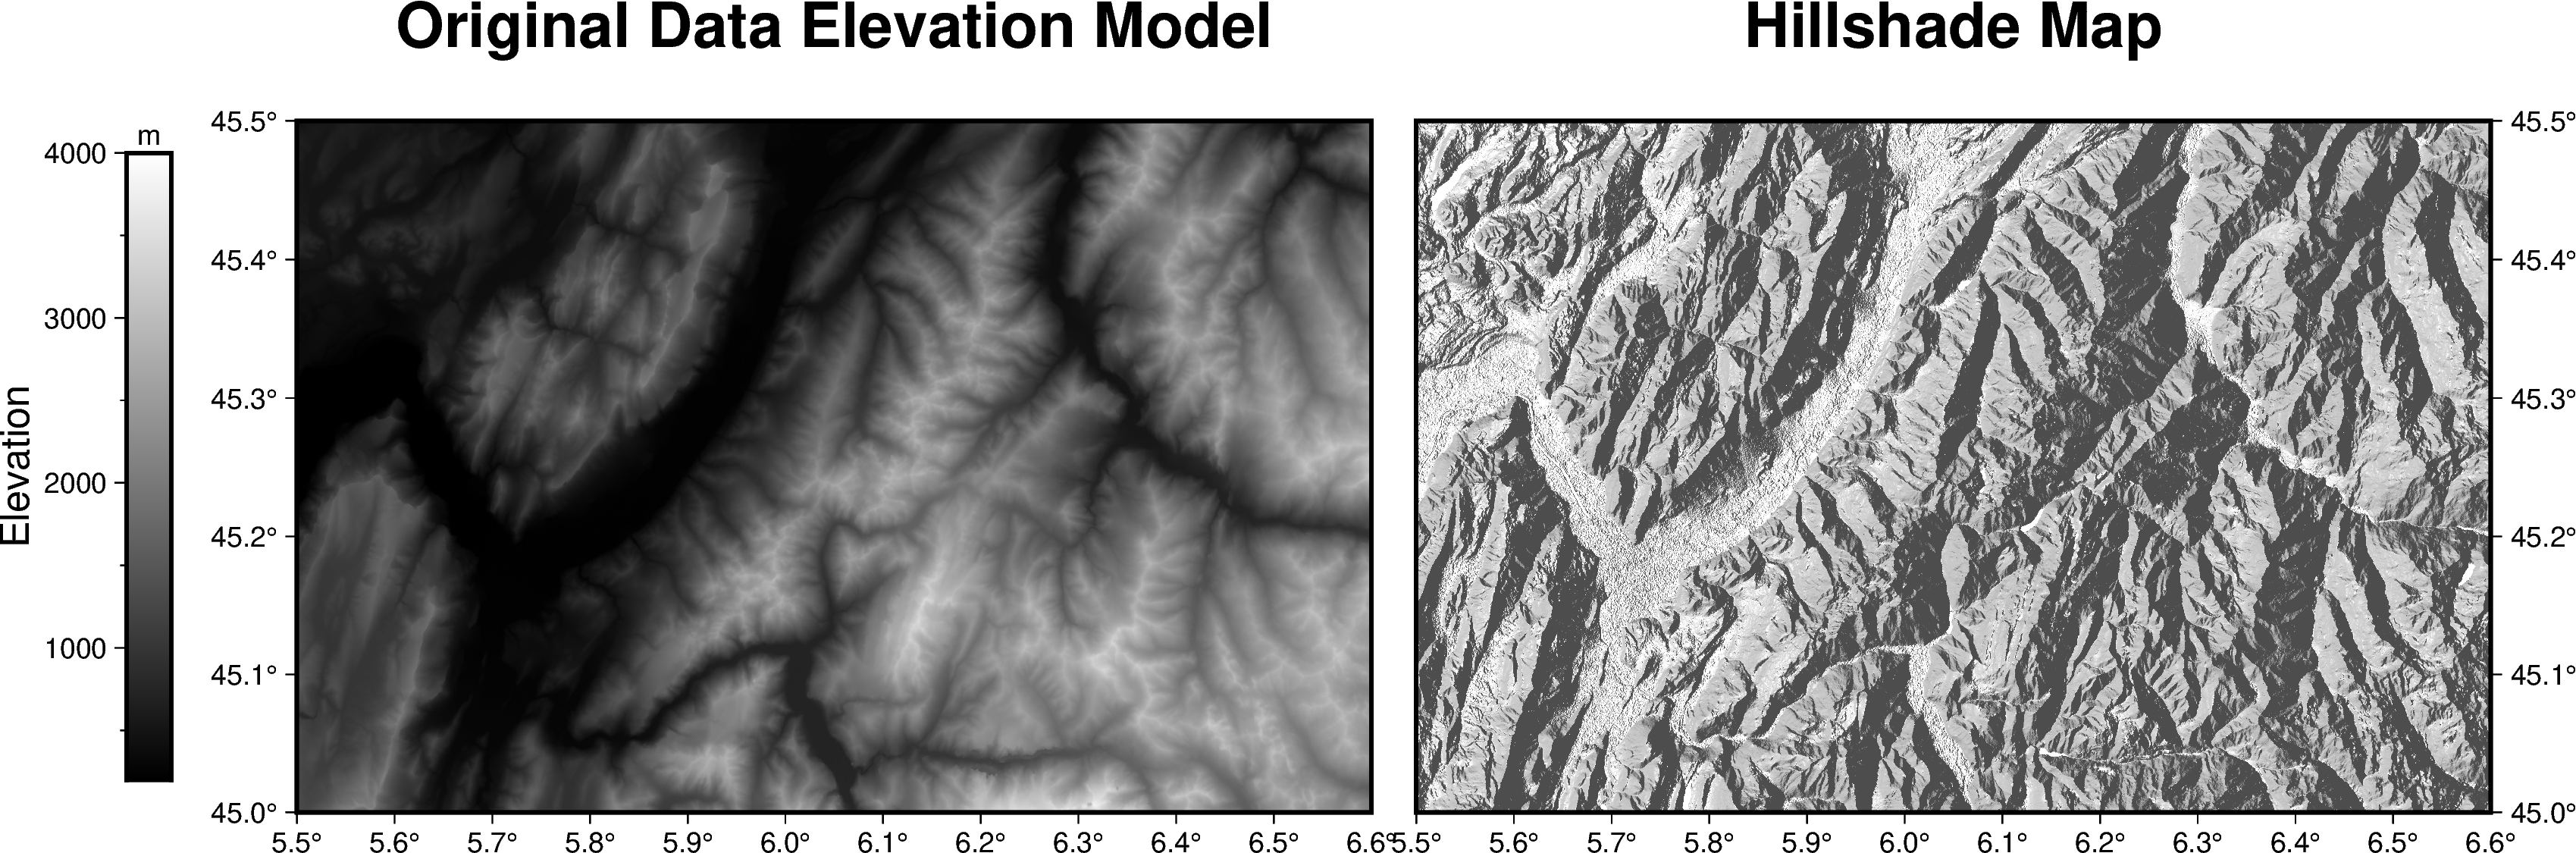

In [35]:
import pygmt

# Define region of interest around Yosemite valley
region = [-119.825, -119.4, 37.6, 37.825]
# Define region of interest around Belledonne
region = [5.5, 6.6, 45, 45.5]

# Load sample grid (3 arc second global relief) in target area
grid = pygmt.datasets.load_earth_relief(resolution="01s", region=region)

# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])

fig = pygmt.Figure()
# define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

# --------------- plotting the original Data Elevation Model -----------

pygmt.makecpt(cmap="gray", series=[200, 4000, 10])
fig.grdimage(
    grid=grid,
    projection="M12c",
    frame=['WSrt+t"Original Data Elevation Model"', "xa0.1", "ya0.1"],
    cmap=True,
)

fig.colorbar(position="JML+o1.4c/0c+w7c/0.5c", frame=["xa1000f500+lElevation", "y+lm"])

# --------------- plotting the hillshade map -----------

# Shift plot origin of the second map by 12.5 cm in x direction
fig.shift_origin(xshift="12.5c")

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=['lSEt+t"Hillshade Map"', "xa0.1", "ya0.1"],
    cmap=True,
)

fig.show()

In [40]:
dgrid[:10, :10]
dgrid.shape

(1801, 3961)